# Lets look at a simple implementaion of linear regression algorithm from scratch
## We use the classic medical insurance dataset

In [57]:
import pandas as pd
import numpy as np

In [58]:
ldf_insurance = pd.read_csv("data/insurance.csv")

In [59]:
ldf_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


zi = (xi – min(x)) / (max(x) – min(x))

where:

zi: The ith normalized value in the dataset
xi: The ith value in the dataset
min(x): The minimum value in the dataset
max(x): The maximum value in the dataset

In [60]:
def numeric_normalizer(age, pint_min_value, pint_max_value, normalization_type = "scale_to_range"):
    
    # We use the scale to range normalization by default ( Scales the values between 0-1 )
    # Useful when the data is approzimately uniformly distributed
    if normalization_type=="scale_to_range":
        return (age - pint_min_value)/(pint_max_value - pint_min_value)
    
    # Useful when the only a few outliers are present in the data
    if normalization_type=="z_score":
        # To be implemented
        pass

In [61]:
def normalize_data(ldf_insurance):
    # Normalize Age
    lint_min_age = min(ldf_insurance["age"])
    lint_max_age = max(ldf_insurance["age"])
    ldf_insurance["age"] = ldf_insurance["age"].apply(numeric_normalizer, args=[lint_min_age, lint_max_age])
    
    # Normalize bmi
    lint_min_bmi = min(ldf_insurance["bmi"])
    lint_max_bmi = max(ldf_insurance["bmi"])
    ldf_insurance["bmi"] = ldf_insurance["bmi"].apply(numeric_normalizer, args=[lint_min_bmi, lint_max_bmi])
    
    # Normalize Children
    lint_min_children = min(ldf_insurance["children"])
    lint_max_children = max(ldf_insurance["children"])
    ldf_insurance["children"] = ldf_insurance["children"].apply(
        numeric_normalizer, args=[lint_min_children, lint_max_children])
    
    # Categorize sex
    ldf_insurance['sex'] = ldf_insurance['sex'].astype('category').cat.codes
    # Categorize smoker
    ldf_insurance['smoker'] = ldf_insurance['smoker'].astype('category').cat.codes
    # Categorize region
    ldf_insurance['region'] = ldf_insurance['region'].astype('category').cat.codes

In [62]:
# Now lets call the normalize data method on our dataset
normalize_data(ldf_insurance)
normalized_data = np.array(ldf_insurance, dtype=float)

In [111]:
# Let's check if our method did what it was supposed to
normalized_data


array([[2.17391304e-02, 0.00000000e+00, 3.21226796e-01, ...,
        1.00000000e+00, 3.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 4.79149852e-01, ...,
        0.00000000e+00, 2.00000000e+00, 1.72555230e+03],
       [2.17391304e-01, 1.00000000e+00, 4.58434221e-01, ...,
        0.00000000e+00, 2.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 5.62012376e-01, ...,
        0.00000000e+00, 2.00000000e+00, 1.62983350e+03],
       [6.52173913e-02, 0.00000000e+00, 2.64729621e-01, ...,
        0.00000000e+00, 3.00000000e+00, 2.00794500e+03],
       [9.34782609e-01, 0.00000000e+00, 3.52703793e-01, ...,
        1.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

In [52]:
# Lets define our hypothesis
# hθ(x) = θ0 + θ1x1 + θ2x2 + θ3x3 +…..+ θnxn
def hypothesis(inputs, weights):
    return np.matmul(weights, inputs)

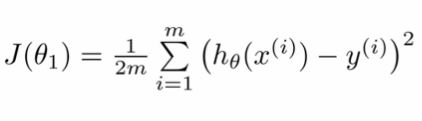
source: https://www.holehouse.org/
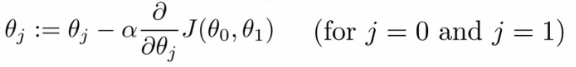

In [54]:
def cost(inputs, labels, weights):
    return

In [106]:
def get_train_and_test_data(train_sample_partition):
    
    # Get the index at which the data is supposed to be partitioned
    lint_partition_index = int(train_sample_partition*len(normalized_data))
    
    # For the features (independent variables) we use the 1st 5 columns [age, sex, bmi, children, smoker, region]
    train_features = normalized_data[:lint_partition_index, :5]
    test_features = normalized_data[lint_partition_index:, :5]
    
    # For the labels (dependent variables) we use the last column [charges]
    train_labels = normalized_data[:lint_partition_index, -1]
    test_labels = normalized_data[lint_partition_index:, -1]
    
    return train_features, train_labels, test_features, test_labels

In [107]:
def run(epochs=1000, learning_rate=0.001, train_sample_partition=.65):
    train_features, train_labels, test_features, test_labels = get_train_and_test_data(train_sample_partition)

In [108]:
run()